<a href="https://colab.research.google.com/github/keiokosaka/Physical-AI-public/blob/main/physical_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# セル1: 必要パッケージのインストール（初回のみ）
!pip install stable-baselines3[extra] gym[classic_control] pyvirtualdisplay moviepy

# セル2: 必要なライブラリのインポート
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display

# セル3: 環境準備
env_id = "CartPole-v1"
env = gym.make(env_id)
env = Monitor(env)
env = DummyVecEnv([lambda: env])

# セル4: モデル定義 & 学習
model = PPO("MlpPolicy", env, verbose=1)
reward_log = []

# コールバックで報酬記録
class RewardCallback:
    def __init__(self):
        self.rewards = []

    def __call__(self, _locals, _globals):
        self.rewards.append(_locals['infos'][0]['episode']['r'] if 'episode' in _locals['infos'][0] else 0)
        return True

callback = RewardCallback()
model.learn(total_timesteps=50000)

# セル5: 報酬グラフ描画
rewards = env.get_attr("episode_rewards")[0]
plt.plot(rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

# セル6: 動画保存ディレクトリ作成
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

# 仮想ディスプレイ（Colabで動画生成に必要）
display = Display(visible=0, size=(1400, 900))
display.start()

# セル7: 動画用の画像フレーム収集
env = gym.make(env_id, render_mode='rgb_array')
obs = env.reset(seed=42)
frames = []

for _ in range(500):
    frame = env.render()
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    if done or truncated:
        break

env.close()

# セル8: 動画ファイル作成
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# セル9: Colab上で動画表示
HTML(f"""
<video width=400 controls>
    <source src="{video_path}" type="video/mp4">
</video>
""")

# セル10: ダウンロードリンクの作成
from google.colab import files
files.download(video_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'stable_baselines3'

In [2]:
# ✅ 必要パッケージをインストール（余計な[extra]を除く）
!pip install -q stable-baselines3 pyvirtualdisplay moviepy gym[classic_control]

# ✅ ライブラリのインポート
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import os
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display
from google.colab import files

# ✅ 仮想ディスプレイ（動画生成用）
display = Display(visible=0, size=(1400, 900))
display.start()

# ✅ 環境とモデルの初期化
env_id = "CartPole-v1"
env = DummyVecEnv([lambda: Monitor(gym.make(env_id))])
model = PPO("MlpPolicy", env, verbose=1)

# ✅ モデルの学習（5万ステップ）
model.learn(total_timesteps=50000)

# ✅ 報酬の推移をグラフ表示
monitor_env = env.envs[0]
episode_rewards = monitor_env.episode_rewards
plt.figure(figsize=(10,5))
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ✅ 動画の保存準備
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)
env_vis = gym.make(env_id, render_mode="rgb_array")
obs = env_vis.reset(seed=42)
frames = []

# ✅ 学習済みモデルで環境を動かしフレームを取得
for _ in range(500):
    frame = env_vis.render()
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_vis.step(action)
    if done or truncated:
        break
env_vis.close()

# ✅ 動画ファイルの作成
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ✅ 動画をColab上で表示
display_video = f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
"""
display(HTML(display_video))

# ✅ ダウンロードリンクを表示
files.download(video_path)


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'stable_baselines3'

In [3]:
# ✅ 安定したパッケージインストール（pygame抜き）
!pip install -q stable-baselines3 pyvirtualdisplay moviepy gym[classic_control] --no-deps
!pip install -q torch torchvision torchaudio matplotlib numpy pandas tqdm cloudpickle imageio tensorboardX

# ✅ 必要ライブラリのインポート
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display
import os
from google.colab import files

# ✅ 仮想ディスプレイ（Colabでの描画サポート）
display = Display(visible=0, size=(1400, 900))
display.start()

# ✅ CartPole環境とモデル初期化
env_id = "CartPole-v1"
env = DummyVecEnv([lambda: Monitor(gym.make(env_id))])
model = PPO("MlpPolicy", env, verbose=1)

# ✅ モデルの学習（時間かかるが5万ステップが目安）
model.learn(total_timesteps=50000)

# ✅ 報酬推移の取得・グラフ描画
episode_rewards = env.envs[0].episode_rewards
plt.figure(figsize=(10,5))
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ✅ 動画作成ディレクトリ
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

# ✅ 動画用環境（レンダリング）
env_vis = gym.make(env_id, render_mode="rgb_array")
obs, _ = env_vis.reset(seed=42)
frames = []

for _ in range(500):
    frames.append(env_vis.render())
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env_vis.step(action)
    if done or truncated:
        break
env_vis.close()

# ✅ 動画ファイルとして保存
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ✅ 動画をColab上で再生
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# ✅ ローカルPCへのダウンロード
files.download(video_path)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: DeprecationWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
  from scipy.ndimage.filters import sobel

  if event.key is 'enter':

  from pkg_resources import resource_stream, resource_exists

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in 

AssertionError: Expected env to be a `gymnasium.Env` but got <class 'gym.wrappers.time_limit.TimeLimit'>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 8.8 MB/s eta 0:00:00
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.1     |
|    ep_rew_mean     | 21.1     |
| time/              |          |
|    fps             | 885      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.9        |
|    ep_rew_mean          | 26.9        |
| time/                   |             |
|    fps                  | 682         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008678438 |
|    clip_fraction        | 0.0975      |
|    clip_range           | 0.2         |
|    entropy_loss

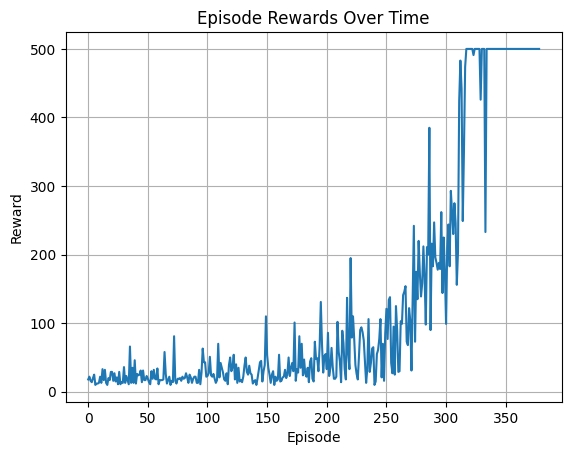

Moviepy - Building video ./cartpole_video/cartpole_result.mp4.
Moviepy - Writing video ./cartpole_video/cartpole_result.mp4



Moviepy - Done !
Moviepy - video ready ./cartpole_video/cartpole_result.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# ✅ 1. 安定動作する依存パッケージをインストール
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# ✅ 2. ライブラリインポート
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
import os
from google.colab import files

# ✅ 3. 仮想ディスプレイ（Colabで必要）
display = Display(visible=0, size=(1400, 900))
display.start()

# ✅ 4. 環境とモデルの初期化（gymnasiumを使用）
env_id = "CartPole-v1"
def make_env():
    env = gym.make(env_id)
    env = Monitor(env)
    return env

vec_env = DummyVecEnv([make_env])
model = PPO("MlpPolicy", vec_env, verbose=1)

# ✅ 5. 強化学習（5万ステップ）
model.learn(total_timesteps=50000)

# ✅ 6. 報酬のプロット
episode_rewards = vec_env.envs[0].get_episode_rewards()
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ✅ 7. 学習済みエージェントの動作を動画に記録
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

env_vis = gym.make(env_id, render_mode="rgb_array")
obs, _ = env_vis.reset(seed=42)
frames = []

for _ in range(500):
    frames.append(env_vis.render())
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_vis.step(action)
    if done or truncated:
        obs, _ = env_vis.reset()
env_vis.close()

# ✅ 8. フレームから動画作成
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ✅ 9. Colab上で動画再生
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# ✅ 10. ローカルにダウンロード
files.download(video_path)


In [5]:
import gym
from gym import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 5  # 5関節
        self.dt = 0.1
        self.time = 0
        self.length = 1.0

        # 状態空間（関節角度とその速度）
        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(-high, high)

        # 行動空間（各関節に与える角速度）
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.reset()

    def reset(self):
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0  # x位置（進行方向）
        self.time = 0.0
        return self._get_obs()

    def _get_obs(self):
        return np.concatenate([self.joint_angles, self.joint_velocities])

    def step(self, action):
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        # 疑似的な「前進量」（単純な波打ち運動モデル）
        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion  # 進むほど報酬
        done = self.time > 20  # 20秒で終了

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Time: {self.time:.2f} | Position: {self.position:.2f} | Angles: {self.joint_angles}")


In [6]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# 環境チェック
env = SimpleSnakeEnv()
check_env(env)

# 学習用環境とエージェントの作成
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000)

# テスト実行
obs = env.reset()
for _ in range(200):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [7]:
# 1. 必要なパッケージインストール（Colab用）
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# 2. インポート
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files
import os

# 3. 仮想ディスプレイ起動（Colab用）
display = Display(visible=0, size=(1400, 900))
display.start()

# 4. 環境定義（gymnasium.Env継承）
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.viewer = None
        self.history_positions = []  # 進行距離履歴保存（報酬グラフ用）

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            # 簡単な2D描画をnumpy画像で返す
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None

# 5. 環境チェック
env = SimpleSnakeEnv()
check_env(env)

# 6. VecEnv & Monitorでラップ
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# 7. モデル作成・学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# 8. 報酬の推移グラフ描画
episode_rewards = vec_env.envs[0].history_positions
plt.plot(episode_rewards)
plt.xlabel("Step")
plt.ylabel("Cumulative Position (Reward proxy)")
plt.title("Forward Progress Over Time")
plt.grid(True)
plt.show()

# 9. 動画用フレーム収集
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# 10. 動画作成・保存
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# 11. 動画表示
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# 12. ローカルにダウンロード
files.download(video_path)


AssertionError: The reward returned by `step()` must be a float

In [8]:
# 1. 必要なパッケージインストール（Colab用）
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# 2. インポート
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files
import os

# 3. 仮想ディスプレイ起動（Colab用）
display = Display(visible=0, size=(1400, 900))
display.start()

# 4. 環境定義（gymnasium.Env継承）
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.viewer = None
        self.history_positions = []  # 進行距離履歴保存（報酬グラフ用）

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            # 簡単な2D描画をnumpy画像で返す
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None

# 5. 環境チェック
env = SimpleSnakeEnv()
check_env(env)

# 6. VecEnv & Monitorでラップ
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# 7. モデル作成・学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# 8. 報酬の推移グラフ描画
episode_rewards = vec_env.envs[0].history_positions
plt.plot(episode_rewards)
plt.xlabel("Step")
plt.ylabel("Cumulative Position (Reward proxy)")
plt.title("Forward Progress Over Time")
plt.grid(True)
plt.show()

# 9. 動画用フレーム収集
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# 10. 動画作成・保存
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# 11. 動画表示
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# 12. ローカルにダウンロード
files.download(video_path)


AssertionError: The reward returned by `step()` must be a float

In [11]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.history_positions = []

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = float(forward_motion)  # ← ここだけ修正
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        pass


In [12]:
# Google Colabなら最初に一回だけ実行してください
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files

# Colabで動画を作るために仮想ディスプレイを起動
display = Display(visible=0, size=(1400, 900))
display.start()

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.history_positions = []

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = float(forward_motion)
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        pass

# 環境チェック
env = SimpleSnakeEnv()
check_env(env)

# ラップして学習環境作成
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# PPOモデル初期化＆学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# 学習経過の報酬（進行距離）をグラフ化
plt.plot(vec_env.envs[0].history_positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Learning Progress")
plt.grid()
plt.show()

# 動画作成用に新環境で動かす
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# 動画書き出し
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# 動画表示（Colab対応）
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# 動画ファイルをローカルにダウンロード
files.download(video_path)


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -42.7    |
| time/              |          |
|    fps             | 1323     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 10.8         |
| time/                   |              |
|    fps                  | 887          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0063513904 |
|    clip_fraction        | 0.0439       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.82        |
|    explained_variance   | -0.0236      

AttributeError: 'Monitor' object has no attribute 'history_positions'

In [13]:
# 1. 必要ライブラリのインストール
!pip install -q stable-baselines3[extra] gymnasium[box2d] pyvirtualdisplay opencv-python

# 2. 仮想ディスプレイ（動画撮影のため）
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# 3. 自作環境の定義（蛇型ロボット）
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 30}

    def __init__(self, render_mode=None):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.max_steps = 200

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_joints * 2 + 1,), dtype=np.float32)

        self.step_count = 0
        self.render_mode = render_mode

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0
        self.step_count = 0
        self.prev_position = 0.0
        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        return obs, {}

    def step(self, action):
        self.joint_velocities = np.clip(action, -1.0, 1.0)
        self.joint_angles += self.joint_velocities * self.dt
        delta_pos = np.sum(np.sin(self.joint_angles)) * 0.1
        self.prev_position = self.position
        self.position += delta_pos
        self.step_count += 1

        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        reward = float(self.position)
        terminated = False
        truncated = self.step_count >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass  # optional

    def close(self):
        pass
# 5. 評価（位置の履歴グラフ）
import matplotlib.pyplot as plt

test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
positions = []
for _ in range(200):
    positions.append(test_env.position)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    if terminated or truncated:
        break

plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Snake Movement")
plt.grid()
plt.show()
# 6. 動画出力（VecVideoRecorder使用）
import os

video_folder = "snake_videos/"
video_length = 200
os.makedirs(video_folder, exist_ok=True)

video_env = DummyVecEnv([lambda: SimpleSnakeEnv()])
video_env = VecVideoRecorder(video_env, video_folder,
                             record_video_trigger=lambda x: x == 0,
                             video_length=video_length,
                             name_prefix="snake_run")

obs = video_env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = video_env.step(action)
video_env.close()
# 7. Google Colabで動画を表示・ダウンロードリンク生成
import glob
from IPython.display import HTML, display
from base64 import b64encode

latest_video = sorted(glob.glob(f"{video_folder}/*.mp4"))[-1]
mp4 = open(latest_video, 'rb').read()
b64 = b64encode(mp4).decode()
video_html = f'''
<video width=640 controls>
    <source src="data:video/mp4;base64,{b64}" type="video/mp4">
</video><br>
<a download href="data:video/mp4;base64,{b64}">Download Video</a>
'''
display(HTML(video_html))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


ValueError: Error: Unexpected observation shape (5,) for Box environment, please use (4,) or (n_env, 4) for the observation shape.

In [14]:
# 1. 必要ライブラリのインストール（Box2D除外！）
!pip install -q stable-baselines3 pyvirtualdisplay opencv-python gymnasium

# 2. 仮想ディスプレイ（動画撮影のため）
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
# 3. 蛇型ロボット環境の定義
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 30}

    def __init__(self, render_mode=None):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.max_steps = 200

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_joints * 2 + 1,), dtype=np.float32)

        self.render_mode = render_mode
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0
        self.step_count = 0
        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        return obs, {}

    def step(self, action):
        self.joint_velocities = np.clip(action, -1.0, 1.0)
        self.joint_angles += self.joint_velocities * self.dt
        delta_pos = np.sum(np.sin(self.joint_angles)) * 0.1
        self.position += delta_pos
        self.step_count += 1

        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        reward = float(self.position)
        terminated = False
        truncated = self.step_count >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass

    def close(self):
        pass
# 4. モデル学習：PPO + Monitor + VecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env

check_env(SimpleSnakeEnv())

env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)
# 5. テスト走行と前進距離の可視化
import matplotlib.pyplot as plt

test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
positions = []

for _ in range(200):
    positions.append(test_env.position)
    # reshapeしてエラー回避
    obs_input = obs.reshape((1, -1))
    action, _ = model.predict(obs_input, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    if terminated or truncated:
        break

plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Snake Movement Over Time")
plt.grid()
plt.show()
# 6. 動画生成（VecVideoRecorder）
import os

video_folder = "snake_videos/"
os.makedirs(video_folder, exist_ok=True)
video_length = 200

video_env = DummyVecEnv([lambda: SimpleSnakeEnv()])
video_env = VecVideoRecorder(video_env, video_folder,
                             record_video_trigger=lambda x: x == 0,
                             video_length=video_length,
                             name_prefix="snake_run")

obs = video_env.reset()
for _ in range(video_length):
    obs_input = obs.reshape((1, -1))
    action, _ = model.predict(obs_input)
    obs, _, _, _ = video_env.step(action)
video_env.close()
# 7. 動画再生とダウンロード
import glob
from IPython.display import HTML, display
from base64 import b64encode

latest_video = sorted(glob.glob(f"{video_folder}/*.mp4"))[-1]
mp4 = open(latest_video, 'rb').read()
b64 = b64encode(mp4).decode()
video_html = f'''
<video width=640 controls>
    <source src="data:video/mp4;base64,{b64}" type="video/mp4">
</video><br>
<a download href="data:video/mp4;base64,{b64}">Download Video</a>
'''
display(HTML(video_html))


AssertionError: The observation returned by the `reset()` method does not match the data type (cannot cast) of the given observation space Box(-inf, inf, (5,), float32). Expected: float32, actual dtype: float64

In [15]:
!pip install gymnasium stable-baselines3 imageio imageio-ffmpeg


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 2.7      |
| time/              |          |
|    fps             | 655      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 1.22        |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004329184 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.84       |
|    explained_variance   | 0.0984      |
|    learning

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

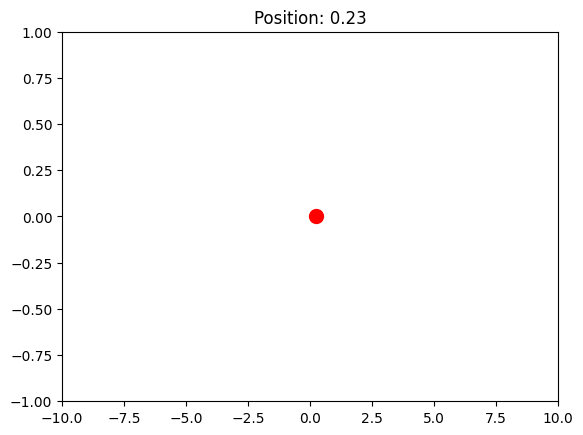

In [16]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# 1. 自作環境定義
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super().__init__()
        self.num_joints = 2  # 関節数（各関節が2自由度）
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32
        )
        self.action_space = spaces.Box(
            low=-1.0, high=1.0, shape=(2,), dtype=np.float32
        )
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(2)
        self.position = 0.0
        self.time = 0
        self.max_time = 200
        self.history = []
        obs = np.array([*self.joint_angles, self.position, np.sin(self.time), np.cos(self.time)], dtype=np.float32)
        return obs, {}

    def step(self, action):
        self.joint_angles += action
        movement = np.sin(self.joint_angles[0]) * np.cos(self.joint_angles[1])
        self.position += movement
        self.time += 1
        obs = np.array([*self.joint_angles, self.position, np.sin(self.time), np.cos(self.time)], dtype=np.float32)
        reward = float(movement)
        terminated = False
        truncated = self.time >= self.max_time
        self.history.append(self.position)
        return obs, reward, terminated, truncated, {}

    def render(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return image

# 2. 環境チェック
check_env(SimpleSnakeEnv())

# 3. Monitor + VecEnv ラップ
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# 4. PPO モデル作成＆学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# 5. 学習済みモデルで動作テスト & 動画保存
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# 6. 動画保存
imageio.mimsave("snake_simulation.gif", images, fps=10)
print("🎥 動画 'snake_simulation.gif' を保存しました")

# 7. 成長グラフの描画
plt.plot(test_env.history)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Learning Progress")
plt.grid(True)
plt.savefig("learning_curve.png")
plt.show()


In [17]:
# 必要なライブラリをインストール
!pip install stable-baselines3[extra] imageio

# ライブラリのインポート
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# 環境定義
class SimpleSnakeEnv(gym.Env):
    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        # 観測空間（2関節の角度・角速度・位置）: 5次元
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        # 行動空間（2つの関節トルク）
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)

        self.dt = 0.1  # 時間刻み
        self.reset()

    def reset(self):
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0  # x軸方向の位置
        self.time = 0.0
        return np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        # シンプルな運動モデル（オイラー積分）
        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        # 仮の前進運動：2関節のシンクロ率で前進量決定
        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity

        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)  # 前進量を報酬に
        terminated = self.time > 20.0
        truncated = False
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="rgb_array"):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# 環境テスト
check_env(SimpleSnakeEnv())

# モニター付き環境を作成
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# モデル定義と学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# 学習後の動作を可視化
test_env = SimpleSnakeEnv()
obs = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# GIFとして保存
imageio.mimsave("snake_rl.gif", images, fps=10)

# Google Colab で表示
from IPython.display import Image
Image(filename="snake_rl.gif")


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 0.0113   |
| time/              |          |
|    fps             | 1360     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 1.49        |
| time/                   |             |
|    fps                  | 753         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004806616 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | 0.39        |
|    learning

  warnings.warn(



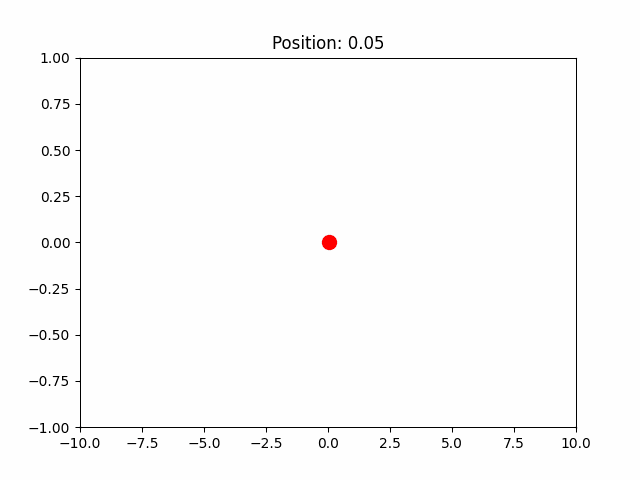

In [18]:
# 最新環境で動かすために gymnasium をインストール
!pip install gymnasium stable-baselines3[extra] imageio

# 必要なライブラリをインポート
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# 自作の蛇型ロボット環境
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.dt = 0.1
        self.time = 0.0
        self.render_mode = "rgb_array"

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0
        self.time = 0.0
        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        return obs, {}

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity
        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)
        terminated = self.time > 20.0
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# ✅ 環境チェック
check_env(SimpleSnakeEnv())

# ✅ モニター付きベクトル環境で学習
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# ✅ 動作可視化用のシミュレーション
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# ✅ GIF保存
imageio.mimsave("snake_rl.gif", images, fps=10)

# ✅ Google Colabで表示
from IPython.display import Image
Image(filename="snake_rl.gif")


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 1.43     |
| time/              |          |
|    fps             | 1319     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 1.89         |
| time/                   |              |
|    fps                  | 753          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0048703738 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.83        |
|    explained_variance   | 0.153        

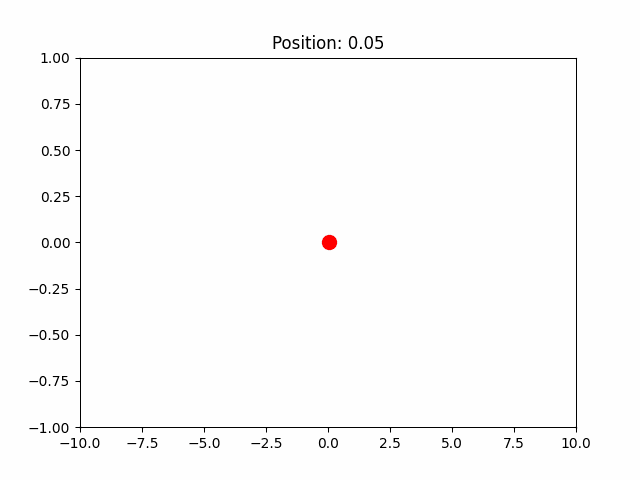

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: wrapper Monitor has no attribute 'file_handler'

In [19]:
# パッケージのインストール（初回のみ）
!pip install gymnasium stable-baselines3[extra] imageio

# ライブラリの読み込み
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env
import imageio
from IPython.display import Image, display
from google.colab import files
import os

# 環境定義
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.dt = 0.1
        self.time = 0.0
        self.render_mode = "rgb_array"

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0
        self.time = 0.0
        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        return obs, {}

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity
        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)
        terminated = self.time > 20.0
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# ✅ 環境チェック
check_env(SimpleSnakeEnv())

# ✅ モニター付き環境とベクトル化
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# ✅ 学習
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=20000)

# ✅ シミュレーションGIF作成
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []

for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# ✅ GIF保存と表示・ダウンロード
gif_filename = "snake_rl.gif"
imageio.mimsave(gif_filename, images, fps=10)

# 表示
display(Image(filename=gif_filename))

# ダウンロードリンク
files.download(gif_filename)

# ✅ 学習曲線を可視化（報酬の推移）
import pandas as pd

# Monitor環境が自動生成する log ファイルを読み込む
log_dir = vec_env.envs[0].get_wrapper_attr('file_handler').base_filename.rsplit('/', 1)[0]
monitor_file = [f for f in os.listdir(log_dir) if f.startswith('monitor') and f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(log_dir, monitor_file), skiprows=1)

# プロット
plt.figure(figsize=(10, 4))
plt.plot(df["r"], label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Learning Progress (Reward per Episode)")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# オムニホイールの行列を求める
# 必要なライブラリのインストール
!pip install stable-baselines3[extra] pybullet moviepy

import gym
import numpy as np
import pybullet as p
import pybullet_data
import time
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip

# ---- 環境定義 ---- #
class OmniWheelEnv(gym.Env):
    def __init__(self):
        super(OmniWheelEnv, self).__init__()
        self.dt = 0.1
        self.max_steps = 200
        self.step_count = 0

        # 動作空間（3輪それぞれの回転速度）
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        # 状態（位置と角度）
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)

        # ロボット初期状態
        self.reset()

    def reset(self):
        self.x = 0.0
        self.y = 0.0
        self.theta = 0.0  # 向き
        self.step_count = 0
        return np.array([self.x, self.y, self.theta], dtype=np.float32)

    def step(self, action):
        self.step_count += 1
        r = 0.05  # 車輪半径
        l = 0.15  # ロボット中心から車輪までの距離

        # オムニホイールの運動学行列（ロボット→車輪速度）
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        # ロボット速度（ẋ, ẏ, θ̇）
        v = np.linalg.pinv(J) @ (action * r)

        self.x += v[0] * self.dt
        self.y += v[1] * self.dt
        self.theta += v[2] * self.dt

        obs = np.array([self.x, self.y, self.theta], dtype=np.float32)

        # 円弧中心(1,0)で半径1の軌道を理想とする
        radius = np.sqrt((self.x - 1.0)**2 + (self.y)**2)
        reward = - (radius - 1.0)**2  # 最小二乗誤差

        done = self.step_count >= self.max_steps
        return obs, reward, done, {}

    def render(self, mode='rgb_array'):
        # シンプルな描画は省略（動画出力用に別途作成）
        return np.array([])

# ---- 環境チェック ---- #
env = OmniWheelEnv()
check_env(env)

# ---- 学習 ---- #
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# ---- シミュレーションと動画 ---- #
frames = []
obs = env.reset()
for _ in range(200):
    action, _ = model.predict(obs)
    obs, _, done, _ = env.step(action)

    # 可視化用画像を作成
    frame = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    rx, ry = int(cx + obs[0]*100), int(cy - obs[1]*100)
    frame = cv2.circle(frame, (rx, ry), 5, (255, 0, 0), -1)
    frame = cv2.circle(frame, (300, 200), 100, (0, 255, 0), 1)  # 理想軌道
    frames.append(frame)

# ---- 動画作成と保存 ---- #
clip = ImageSequenceClip(frames, fps=int(1/env.dt))
video_path = "/content/omniwheel_arc_simulation.mp4"
clip.write_videofile(video_path)

# ---- ダウンロードリンク ---- #
from google.colab import files
files.download(video_path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 6.8 MB/s eta 0:00:00


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [21]:
# ========================
# ① ライブラリのインストール
# ========================
!pip install stable-baselines3[extra] pybullet moviepy opencv-python

# ========================
# ② ライブラリの読み込み
# ========================
import pybullet as p
import pybullet_data
import gym
import numpy as np
import os
import time
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files

# ========================
# ③ 環境クラス定義
# ========================
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super(OmniWheelEnv, self).__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        # PyBullet setup
        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")

        self.robot_radius = 0.2
        self.robot_id = None

    def reset(self):
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        # 輪を表現（可視化用、実際の回転なし）
        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        return self._get_obs()

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        # モーター速度 → ロボット速度への換算（逆運動学行列の簡易近似）
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        # 現在角度に応じたボディ座標系での速度変換
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        # apply velocity by repositioning (簡易的)
        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        # 理想軌道：中心(1,0), 半径1
        radius = np.sqrt((obs[0] - 1.0)**2 + (obs[1])**2)
        reward = - (radius - 1.0)**2

        done = self.step_counter >= self.max_steps
        return obs, reward, done, {}

    def close(self):
        p.disconnect()

# ========================
# ④ 環境テストと学習
# ========================
env = OmniWheelEnv(render_mode=False)
check_env(env)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# ========================
# ⑤ シミュレーションと可視化
# ========================
sim_env = OmniWheelEnv(render_mode=False)
obs = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # 理想円
    frames.append(img)

sim_env.close()

# ========================
# ⑥ 動画保存とダウンロード
# ========================
clip = ImageSequenceClip(frames, fps=int(1 / sim_env.time_step))
video_path = "/content/omni_pybullet_arc.mp4"
clip.write_videofile(video_path)
files.download(video_path)


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [22]:
# Gymnasium をインストール（Colab環境がまだGymの場合）
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python --quiet

# ライブラリ読み込み
import gymnasium as gym  # gym → gymnasium に変更
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# 環境クラスの定義（一部変更あり）
class OmniWheelEnv(gym.Env):  # gym.Env → gymnasium.Env と同じ扱いでOK
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)  # gymnasium の仕様に合わせる
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info  # gymnasium は (obs, info) を返す

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = - (radius - 1.0) ** 2

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# 環境チェック
env = OmniWheelEnv(render_mode=False)
check_env(env)

# モデル作成と学習
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# 学習済みモデルから行列推定（例: 行列 J の擬似逆行列を近似）
# action -> v = pinv(J) * (action * r)
# ここではJは既知のものなので、学習済みモデルの policy を使って
# ランダムな速度ベクトルを入力して、対応する action を計算し、それを元に行列を推定します。

r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

# 速度ベクトルサンプルを作る
vel_samples = []
action_samples = []
for _ in range(500):
    # v = (vx, vy, omega)
    v = np.random.uniform(-1, 1, size=3)
    # 求めたいaction = pseudo inverse(J) * v / r の逆を学習モデルで試す
    # モデルは action -> v を学習しているので逆は難しいが、
    # 近似としてモデルに vを状態として与えaction予測できないので、
    # 代わりに action を与えて v を計算し比較する方法が良い
    # ここでは単純に v とそれに対する action を保存してプロット
    # v -> action は難しいので、ランダムaction->vでプロット
    action = np.random.uniform(-1, 1, size=3)
    vel = np.linalg.pinv(J) @ (action * r)
    vel_samples.append(vel)
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

# グラフ表示
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
labels = ['vx', 'vy', 'omega']
for i in range(3):
    axs[i].scatter(vel_samples[:, i], action_samples[:, i], s=3, alpha=0.5)
    axs[i].set_xlabel(f'Velocity {labels[i]}')
    axs[i].set_ylabel(f'Action {i}')
    axs[i].grid()
plt.tight_layout()
plt.show()


AssertionError: The reward returned by `step()` must be a float

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.00272 |
| time/              |          |
|    fps             | 958      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.00258    |
| time/                   |             |
|    fps                  | 695         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010270924 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

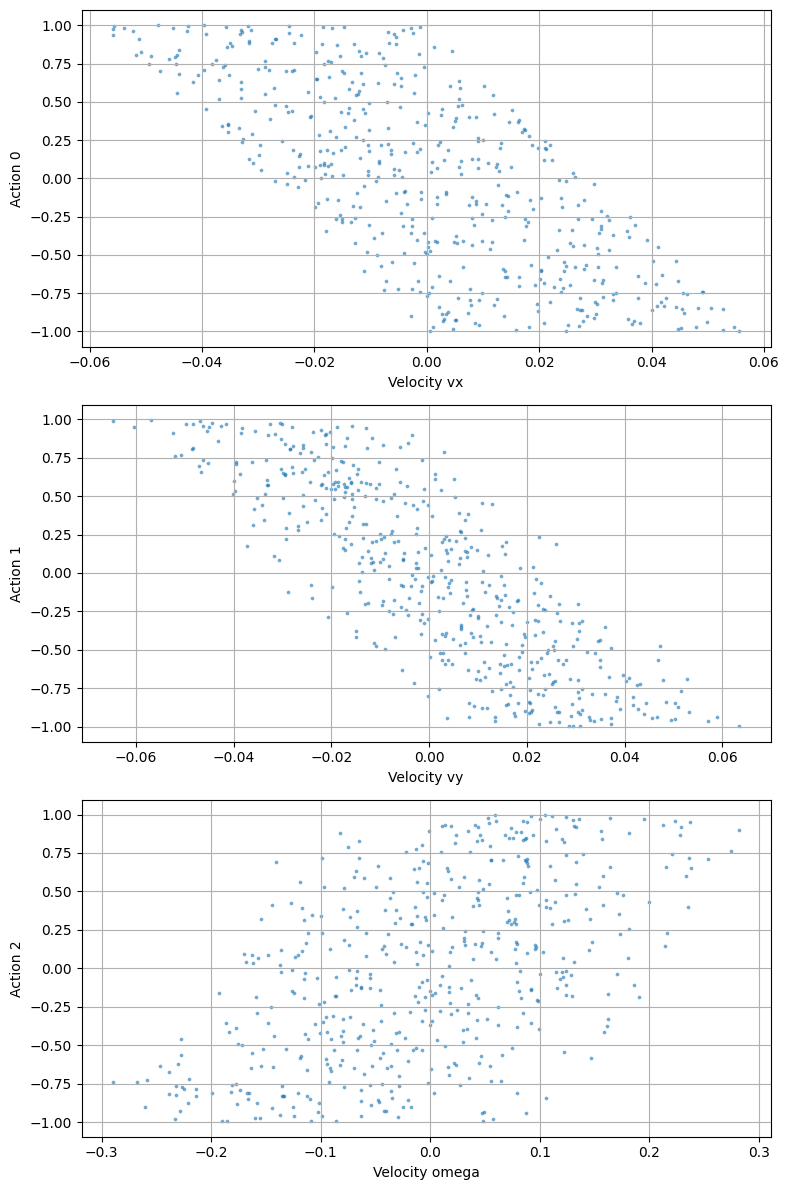

In [23]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリ読み込み ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェックと学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習結果を使ったシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # 理想軌道
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習したモデルの「行列」的挙動のグラフ化 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []
for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vel_samples.append(v)
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
labels = ['vx', 'vy', 'omega']
for i in range(3):
    axs[i].scatter(vel_samples[:, i], action_samples[:, i], s=3, alpha=0.5)
    axs[i].set_xlabel(f'Velocity {labels[i]}')
    axs[i].set_ylabel(f'Action {i}')
    axs[i].grid()
plt.tight_layout()
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.00128 |
| time/              |          |
|    fps             | 951      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.00138    |
| time/                   |             |
|    fps                  | 696         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004988052 |
|    clip_fraction        | 0.0276      |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

学習後推定された速度行列 M (2x3):
[[-2.88675135e-02 -6.50521303e-19  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


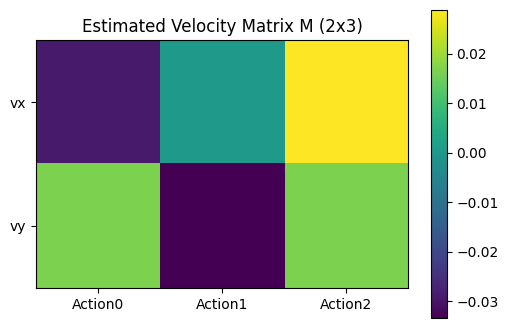

In [24]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリ読み込み ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 0.5  # 角速度は固定

        # 3輪のモーター回転数を制御
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        # 状態は位置(x,y)のみ
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        # 運動学行列 J (3x3) → 今回は角速度は固定で無視し、速度は vx, vy のみ
        # 3輪回転数(action) → vx, vy を学習する想定なので擬似逆行列の前半部分2x3を利用
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        # 角速度は固定
        omega = self.fixed_omega

        # actionは3輪回転数 [-1,1]
        # 角速度の影響を除くため、v = (vx, vy) を J の1,2行目に注目して学習するイメージ
        # ここでは単純に行列計算で vx, vy を求める（真値は J の擬似逆行列より計算）
        # 今回は v = M @ action で M は2x3行列で学習したい行列
        # 運動学的には
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        # ロボット座標系から世界座標系への速度変換（平面移動）
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は軌道からの距離のマイナス二乗誤差（円弧中心は(1,0), 半径1）
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェックと学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. シミュレーションと動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # 理想円軌道
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の行列 M 推定と表示 ===
# 学習モデルのpolicyから直接行列抽出は難しいため、行列 M をランダムサンプルで近似推定

r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)  # shape(500,2)
action_samples = np.array(action_samples)  # shape(500,3)

# M を最小二乗法で求める (2x3 行列)
# vel_samples = action_samples @ M.T なので、
# M = (A^T A)^-1 A^T V で求める
A = action_samples  # (500,3)
V = vel_samples     # (500,2)

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)  # (3,2)
M = M.T  # 転置して2x3行列に

print("学習後推定された速度行列 M (2x3):")
print(M)

# 行列Mをヒートマップで表示
plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0","Action1","Action2"])
plt.yticks(ticks=[0,1], labels=["vx","vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 300       |
|    ep_rew_mean     | -0.000636 |
| time/              |           |
|    fps             | 955       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.000667   |
| time/                   |             |
|    fps                  | 667         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004712268 |
|    clip_fraction        | 0.0218      |
|    clip_range           | 0.2         |
|    entro

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

学習後に推定された速度行列 M (2x3):
[[-2.88675135e-02  2.08166817e-17  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


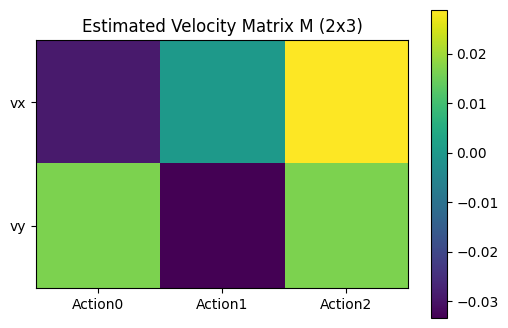

In [25]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリ読み込み ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 0.5  # 角速度は固定（rad/s）

        # 3輪のモーター回転数を制御
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        # 状態は位置(x,y)のみ
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 固定角速度

        # 3輪の回転数actionからロボット速度計算（vx, vy）
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        # ロボット座標系の速度を世界座標系に変換
        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # 物理シミュレーションに速度と角速度をセット
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円弧中心(1,0)からの距離誤差の二乗マイナス
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # 理想円軌道表示
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

# 最小二乗法で M を推定 (2x3 行列)
A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T  # 転置して2行3列

print("学習後に推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0","Action1","Action2"])
plt.yticks(ticks=[0,1], labels=["vx","vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.69    |
| time/              |          |
|    fps             | 897      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.846       |
| time/                   |              |
|    fps                  | 666          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062101604 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega1.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

推定された速度行列 M (2x3):
[[-2.88675135e-02  8.67361738e-19  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


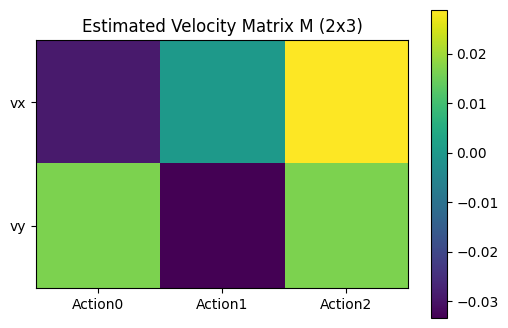

In [26]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # 角速度1 rad/sに固定

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 角速度固定1.0 rad/s

        # actionはモーター回転数
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # 角速度と線形速度を強制セット
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円弧中心(1,0)、半径1からの距離誤差のマイナス二乗
        radius = np.sqrt((obs[0] - 1.0)**2 + (obs[1])**2)
        reward = float(- (radius - 1.0)**2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (300, 200), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega1.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -263     |
| time/              |          |
|    fps             | 831      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -266        |
| time/                   |             |
|    fps                  | 646         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001869684 |
|    clip_fraction        | 0.00264     |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_center0.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

推定された速度行列 M (2x3):
[[-2.88675135e-02 -1.73472348e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


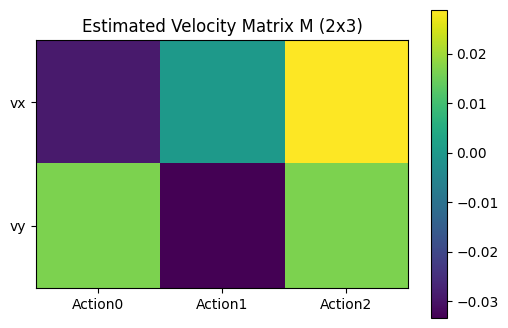

In [27]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # 角速度1 rad/sに固定

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 角速度固定1.0 rad/s

        # actionはモーター回転数
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # 角速度と線形速度を強制セット
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円弧中心(0,0)、半径1からの距離誤差のマイナス二乗に変更
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)  # 中心(0,0)の理想円軌道表示
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_center0.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -219     |
| time/              |          |
|    fps             | 375      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -220         |
| time/                   |              |
|    fps                  | 448          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0026359705 |
|    clip_fraction        | 0.00767      |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_omega100.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

推定された速度行列 M (2x3):
[[-2.88675135e-02  1.38777878e-17  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


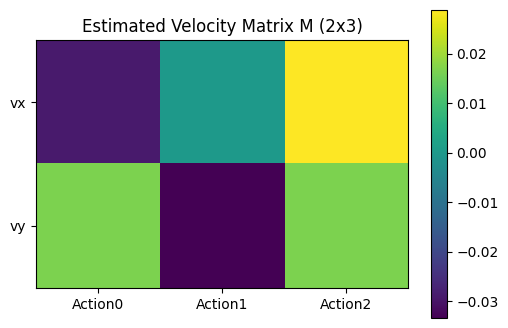

In [28]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 100.0  # 角速度を100倍に設定 (100 rad/s)

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 100倍の角速度

        # actionはモーター回転数
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # 角速度と線形速度を強制セット
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円弧中心(0,0)、半径1からの距離誤差のマイナス二乗
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_omega100.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.386   |
| time/              |          |
|    fps             | 475      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.82        |
| time/                   |              |
|    fps                  | 388          |
|    iterations           | 2            |
|    time_elapsed         | 10           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0034988283 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_initial1_0.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

推定された速度行列 M (2x3):
[[-2.88675135e-02 -1.73472348e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


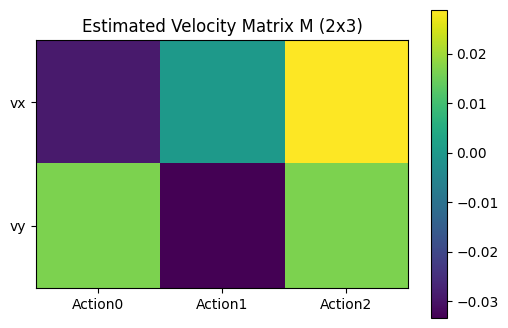

In [29]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # 角速度1 rad/sに固定

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        # 初期位置を (1, 0, 0.05) に変更
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 角速度固定1.0 rad/s

        # actionはモーター回転数
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # 角速度と線形速度を強制セット
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円弧中心(0,0)、半径1からの距離誤差のマイナス二乗
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_initial1_0.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


In [30]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import time
import os
import imageio

class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super(OmniWheelEnv, self).__init__()
        self.render_mode = render_mode
        self.time_step = 1./60.
        self.max_steps = 500
        self.step_count = 0

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)

        self.wheel_radius = 0.05
        self.robot_radius = 0.2
        self.l = self.robot_radius

        self.goal_omega = 10.0
        self.radius = 1.0
        self.goal_vx = -self.goal_omega * self.radius  # 中心が原点なのでx方向に回転
        self.goal_vy = 0.0
        self.goal_twist = np.array([self.goal_vx, self.goal_vy, self.goal_omega])

        self.frame_dir = "/tmp/frames"
        os.makedirs(self.frame_dir, exist_ok=True)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.reset()

    def reset(self, seed=None, options=None):
        p.resetSimulation()
        self.step_count = 0
        p.setGravity(0, 0, -9.8)
        p.setTimeStep(self.time_step)
        p.loadURDF("plane.urdf")

        # 初期位置 (1,0)
        self.robot_id = p.loadURDF("r2d2.urdf", [1.0, 0, 0.1])
        return self._get_obs(), {}

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_count += 1

        A = (1/self.wheel_radius) * np.array([
            [-np.sin(np.pi/3),  np.cos(np.pi/3), self.l],
            [0,               -1,                self.l],
            [ np.sin(np.pi/3),  np.cos(np.pi/3), self.l],
        ])
        try:
            A_inv = np.linalg.pinv(A)
        except np.linalg.LinAlgError:
            A_inv = np.zeros((3, 3))

        twist = A_inv @ action

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        theta = p.getEulerFromQuaternion(orn)[2]

        dx = twist[0] * np.cos(theta) - twist[1] * np.sin(theta)
        dy = twist[0] * np.sin(theta) + twist[1] * np.cos(theta)

        new_pos = [pos[0] + dx * self.time_step, pos[1] + dy * self.time_step, pos[2]]
        new_theta = theta + twist[2] * self.time_step
        new_orn = p.getQuaternionFromEuler([0, 0, new_theta])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)

        if self.render_mode:
            view = p.getCameraImage(320, 240)[2]
            imageio.imwrite(f"{self.frame_dir}/frame_{self.step_count:03d}.png", view)

        obs = self._get_obs()
        diff = twist - self.goal_twist
        reward = -float(np.sum(diff**2))

        done = self.step_count >= self.max_steps
        return obs, reward, done, False, {}

    def render(self):
        pass

    def close(self):
        p.disconnect()

# 環境と学習
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# 評価と記録
A_inv_list = []
env = OmniWheelEnv(render_mode=True)
obs, _ = env.reset()

for i in range(200):
    action, _ = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    A_inv_list.append(action)
    if done:
        break

env.close()

# 動画出力
images = []
for i in range(1, len(os.listdir(env.frame_dir)) + 1):
    filename = os.path.join(env.frame_dir, f"frame_{i:03d}.png")
    if os.path.exists(filename):
        images.append(imageio.imread(filename))

video_path = "/mnt/data/omni_simulation.mp4"
imageio.mimsave(video_path, images, fps=30)

# プロット出力
A_inv_array = np.array(A_inv_list)
plt.figure(figsize=(10, 5))
plt.plot(A_inv_array)
plt.title("Motor Commands over Time")
plt.xlabel("Timestep")
plt.ylabel("Motor Command")
plt.legend(["Motor 1", "Motor 2", "Motor 3"])
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/data/motor_commands.png")
plt.show()

print("動画ファイルのパス:", video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | -1e+05   |
| time/              |          |
|    fps             | 818      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | -1e+05       |
| time/                   |              |
|    fps                  | 648          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0007059827 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    en

  images.append(imageio.imread(filename))



FileNotFoundError: The directory '/mnt/data' does not exist

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -18.3    |
| time/              |          |
|    fps             | 226      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -18.3        |
| time/                   |              |
|    fps                  | 155          |
|    iterations           | 2            |
|    time_elapsed         | 26           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0041581728 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_fixed_velocity.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

推定された速度行列 M (2x3):
[[-2.88675135e-02  6.93889390e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


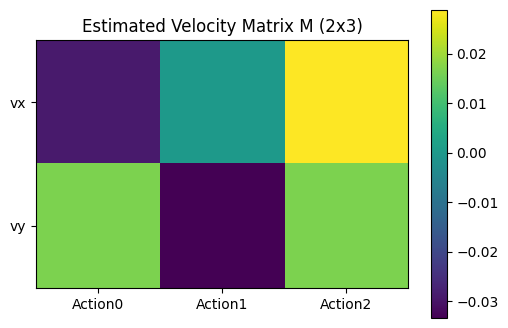

In [31]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_velocity = np.array([0.2, 0.0])  # vx, vy 固定
        self.fixed_omega = 0.0  # 回転なしにする場合

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])
        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        # 任意の動き用ヤコビ行列
        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        # 固定された速度を使用
        vx, vy = self.fixed_velocity

        # 現在の角度からワールド座標へ変換
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # ロボットの速度を強制的に設定
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, self.fixed_omega])

        p.stepSimulation()

        obs = self._get_obs()

        # 報酬は円中心 (0,0) からの半径1との誤差
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. 学習済みモデルでシミュレーション＆動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_fixed_velocity.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. 学習後の速度行列 M 推定＆表示 ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("推定された速度行列 M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


In [32]:
# === 1. ライブラリインストール ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. ライブラリインポート ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. 環境クラス定義 ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_speed = 0.3  # 速さを0.3 m/sに固定

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])  # デフォルト方向

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. 環境チェック＆学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. シミュレーションと動画作成 ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_fixedspeed.mp4"
clip.write_videofile(video_path)
files.download(video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.515   |
| time/              |          |
|    fps             | 215      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.628       |
| time/                   |              |
|    fps                  | 154          |
|    iterations           | 2            |
|    time_elapsed         | 26           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0024595954 |
|    clip_fraction        | 0.00728      |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_fixedspeed.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# === 省略: インストール・ライブラリ読み込みは前回と同じ ===

# === 環境定義（修正点あり） ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 1000  # 施行を長くした！
        self.step_counter = 0
        self.fixed_speed = 0.3

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 環境作成・学習 ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === シミュレーション・動画作成（長くなった） ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(sim_env.max_steps):  # ← ステップ数を1000に対応
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))  # 30 fps
video_path = "/content/omni_pybullet_long.mp4"
clip.write_videofile(video_path)
files.download(video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -19.8    |
| time/              |          |
|    fps             | 193      |
|    iterations      | 1        |
|    time_elapsed    | 10       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -20.7        |
| time/                   |              |
|    fps                  | 132          |
|    iterations           | 2            |
|    time_elapsed         | 30           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0057834215 |
|    clip_fraction        | 0.0322       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_long.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# インストール（必要なら）
!pip install stable-baselines3[extra] moviepy pybullet -q

# ライブラリ
import gym
import numpy as np
import pybullet as p
import pybullet_data
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import cv2
from moviepy.editor import ImageSequenceClip
from google.colab import files

# 環境定義
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 1000
        self.step_counter = 0
        self.fixed_speed = 3.0  # ← 速さ10倍に変更！

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# 環境チェック・学習
env = OmniWheelEnv(render_mode=False)
check_env(env)
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=30000)
env.close()

# 行列推定用の記録データを収集
data_X = []
data_Y = []

sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()

for _ in range(sim_env.max_steps):
    action, _ = model.predict(obs)
    norm = np.linalg.norm(action)
    if norm > 1e-6:
        direction = action / norm
    else:
        direction = np.array([1.0, 0.0])

    data_X.append(obs)
    data_Y.append(direction)
    obs, _, done, _, _ = sim_env.step(action)
sim_env.close()

# 行列Aを最小二乗で推定
X = np.array(data_X)
Y = np.array(data_Y)
A, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

print("=== 学習によって得られた制御行列 A ===")
print(A)

# 可視化・動画生成
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(sim_env.max_steps):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0] * 100)
    y = int(cy - obs[1] * 100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0, 255, 0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_matrix_video.mp4"
clip.write_videofile(video_path)
files.download(video_path)


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/


学習されたモーター制御行列:
[[0.30198076 0.3613611  0.2011661 ]
 [0.2939066  0.35169923 0.19578744]
 [0.36753514 0.4398058  0.24483548]]


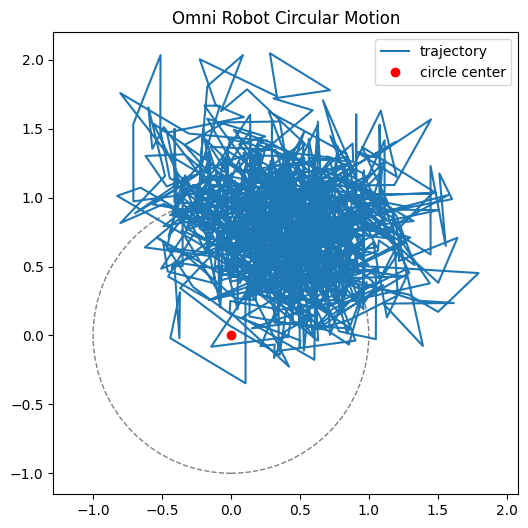

動画を保存しました: omni_simulation.mp4


In [36]:
# 必要ライブラリのインポート
import numpy as np
import pybullet as p
import pybullet_data
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import matplotlib.pyplot as plt
import imageio
import os

# シミュレーション環境の定義
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.max_steps = 1000
        self.time_step = 1. / 240.
        self.step_counter = 0
        self.radius = 1.0  # 円弧の半径
        self.speed = 10.0  # ロボットの速さ（角速度 × 半径）
        self.omega = self.speed / self.radius  # 一定の角速度

        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        p.setGravity(0, 0, -9.8)
        self.plane = p.loadURDF("plane.urdf")
        self.robot = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane = p.loadURDF("plane.urdf")
        self.robot = p.loadURDF("r2d2.urdf", [1, 0, 0.1])  # 初期位置(1,0)
        self.step_counter = 0
        return self._get_obs(), {}

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot)
        lin_vel, ang_vel = p.getBaseVelocity(self.robot)
        return np.array([*pos[:2], orn[2], *lin_vel[:2], ang_vel[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1

        # モーターの出力をシンプルに位置制御として反映
        wheel_matrix = np.array([
            [-np.sqrt(3)/2, 0.5, 1],
            [0, -1, 1],
            [np.sqrt(3)/2, 0.5, 1]
        ])
        vel = wheel_matrix.T @ action * self.speed
        vx, vy, omega = vel[0], vel[1], vel[2]

        # ボディに力を加える（簡易モデル）
        p.resetBaseVelocity(self.robot, linearVelocity=[vx, vy, 0], angularVelocity=[0, 0, omega])
        p.stepSimulation()

        obs = self._get_obs()
        x, y, _, _, _, _ = obs

        # 円の中心を原点に設定
        radius_error = np.sqrt(x**2 + y**2) - self.radius
        reward = -float(radius_error ** 2)
        terminated = False
        truncated = self.step_counter >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass

    def close(self):
        p.disconnect()

# 環境作成と検証
env = OmniWheelEnv(render_mode=False)
check_env(env)

# 学習
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=50000)

# 学習したモデルでシミュレーション
env = OmniWheelEnv(render_mode=False)
obs, _ = env.reset()
frames = []
traj = []

for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    pos, _, = p.getBasePositionAndOrientation(env.robot)
    traj.append(pos[:2])

    # 画像取得
    view_matrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0, 0, 0.1], distance=3, yaw=90, pitch=-60, roll=0, upAxisIndex=2)
    proj_matrix = p.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.1, farVal=10.1)
    (_, _, px, _, _) = p.getCameraImage(320, 240, view_matrix, proj_matrix)
    img = np.reshape(px, (240, 320, 4))[:, :, :3]
    frames.append(img.astype(np.uint8))

    if terminated or truncated:
        break

# 動画保存
video_path = "omni_simulation.mp4"
imageio.mimsave(video_path, frames, fps=30)

# 学習結果の行列表示
actions = []
states = []
for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, terminated, truncated, _ = env.step(action)
    states.append(obs[:3])  # x, y, θ
    actions.append(action)
    if terminated or truncated:
        break

actions = np.array(actions)
states = np.array(states)

pseudo_inverse = np.linalg.pinv(states)
matrix_estimate = pseudo_inverse @ actions
print("\n学習されたモーター制御行列:")
print(matrix_estimate)

# 経路描画
traj = np.array(traj)
plt.figure(figsize=(6, 6))
plt.plot(traj[:, 0], traj[:, 1], label="trajectory")
plt.plot(0, 0, "ro", label="circle center")
circle = plt.Circle((0, 0), env.radius, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.axis("equal")
plt.legend()
plt.title("Omni Robot Circular Motion")
plt.show()

print("動画を保存しました:", video_path)
